# Emotion Analysis by Subtheme per Agreement level

This notebook shows the emotion of a comment. Comments can be viewed individually as well aggregated to the subtheme and theme level. The comments can have the emotions: anger, fear, and sadness.

To determine the emotion of a comment the lexicon NRC Affect Intensity Lexicon v0.5 (Saif M. Mohammad) was used. This lexicon consists of words with a score from 0 to 1 associated with an emotion where the higher the scores indicates the word is more strongly associated with that emotion. To get the overall emotion of the comment the scores from each word are summed and the emotion with the highest score is associated with the comment.  To be able to compare the scores from one comment to another to determine the angriest, saddest and most fearful comments the scores were divided by the **total number of words**. 

The lexicon does contain joy as an emotion but joy was left out of this analysis since the comments should be predominately negative and we are trying to determine the negative emotion driving these comments. Joy was included at first but removed as it was found to be the most common emotion due to the words associated with joy are more common but they are predominately being used with a negative connotation like this example where "good" is the associated joy word but it was being used as "not good". Since this only looks at matching words it does not pick up on how the word is used. When examples of anger, fear and sadness were looked at the words were being used in the appropriate manner for this analysis. 

### Instructions for use

This notebook can be used to look at different emotions, comments, subthemes and themes. Change the parameters of the functions to look at different examples. 


In [1]:
# Required packages
import pandas as pd
import numpy as np
import time

import spacy
# Load English model for SpaCy
nlp = spacy.load('en_core_web_sm')

In [3]:
# Change working directory to be project root, by removing the # and running `os.chdir("..")` once then comment out.
import os
#os.chdir("..")
os.getcwd()

'C:\\Users\\payla\\Documents\\MDS\\Capstone\\DSCI_591_capstone-BCStats'

In [4]:
# remove once notebook is finished
# ensure packages reload after every change 

%load_ext autoreload
%autoreload 2
import src

from src.emotion_analysis import *

## Load Data and Lexicon

In [88]:
# read agreement data
data_full = pd.read_csv(".\data\interim\desensitized_qualitative-data2018.csv",
                            usecols=[0, 1, 2, 3, 4, 5, 6], 
                            names=["USERID", "text", "code1", "code2", "code3", "code4", "code5"], skiprows=1)

# read agreement data
data_agreement = pd.read_csv(".\data\interim\joined_qual_quant.csv",
                            usecols=[0, 1, 4, 5, 6])

# load lexicon
lexicon = pd.read_csv("http://saifmohammad.com/WebDocs/NRC-AffectIntensity-Lexicon.txt", 
                      sep="\t", 
                      skiprows=35) 
# read in data legend
legend = pd.read_csv("./references/data-dictionaries/theme_subtheme_names.csv")

In [89]:
display(data_full.head(3))
display(data_agreement.head(3))
display(lexicon.head(3))
display(legend.head(3))

,USERID,text,code1,code2,code3,code4,code5
0,192723-544650,I would suggest having a developmental growth ...,62,13,NaN,NaN,NaN
1,188281-540434,Base decisions regarding fish and wildlife on ...,116,NaN,NaN,NaN,NaN
2,191202-862188,"Improved office space (fix HVAC, etc) but NO LWS",102,51,NaN,NaN,NaN


,USERID,code,question,diff,text
0,175125-215928,43,Q63,0,The problem with the BCSS is Linda Cavanaugh a...
1,175125-215928,43,Q65,0,The problem with the BCSS is Linda Cavanaugh a...
2,191202-862188,102,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS"


,term,score,AffectDimension
0,outraged,0.964,anger
1,brutality,0.959,anger
2,hatred,0.953,anger


,theme,code,subtheme_description
0,Career & Personal Development,11,Improve new employee orientation
1,Career & Personal Development,12,Improve performance management process
2,Career & Personal Development,13,Improve training and development opportunities


## Add Process Full Comment data and Add Themes Names

In [90]:
data_full = src.emotion_analysis.format_raw_comments(data_full)

In [91]:
data_full = src.emotion_analysis.get_theme_labels(data_full, legend)
data_agreement = src.emotion_analysis.get_theme_labels(data_agreement, legend)

In [92]:
display(data_full.head(3))
display(data_agreement.head(3))

,USERID,code,text,theme,subtheme_description
0,192723-544650,62,I would suggest having a developmental growth ...,Staffing Practices,Focus on Human Resources planning (recruitment...
1,188281-540434,116,Base decisions regarding fish and wildlife on ...,"Vision, Mission & Goals",Reduce political influence
2,191202-862188,102,"Improved office space (fix HVAC, etc) but NO LWS","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l..."


,USERID,code,question,diff,text,theme,subtheme_description
0,175125-215928,43,Q63,0,The problem with the BCSS is Linda Cavanaugh a...,Executives,Strengthen quality of executive leadership
1,175125-215928,43,Q65,0,The problem with the BCSS is Linda Cavanaugh a...,Executives,Strengthen quality of executive leadership
2,191202-862188,102,Q39,0,"Improved office space (fix HVAC, etc) but NO LWS","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l..."


## Obtain Emotion Scores for Each Comment

In [10]:
start = time.time()
full_scores = src.emotion_analysis.obtain_emotion_scores(data_full, lexicon, anger=True, fear=True, sadness=True, joy=True)
end = time.time()
print((end - start) / 60, "mins")

11.354055937131246 mins


In [11]:
start = time.time()
agreement_scores = src.emotion_analysis.obtain_emotion_scores(data_agreement, 
                                                              lexicon, 
                                                              anger=True, fear=False, sadness=False, joy=True)
end = time.time()
print((end - start) / 60, "mins")

12.538353546460469 mins


In [12]:
display(full_scores.head(3))
display(agreement_scores.head(3))

,USERID,code,text,theme,subtheme_description,anger,fear,sad,joy
0,192723-544650,62,i would suggest having a developmental growth ...,Staffing Practices,Focus on Human Resources planning (recruitment...,0.0,0.0,0.0,0.597
1,188281-540434,116,base decisions regarding fish and wildlife on ...,"Vision, Mission & Goals",Reduce political influence,0.0,0.0,0.0,0.000
2,191202-862188,102,"improved office space (fix hvac, etc) but no lws","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l...",0.0,0.0,0.0,0.000


,USERID,code,diff,text,theme,subtheme_description,anger,joy
0,175125-215928,43,0,the problem with the bcss is linda cavanaugh a...,Executives,Strengthen quality of executive leadership,1.851,0.79
1,175125-215928,43,0,the problem with the bcss is linda cavanaugh a...,Executives,Strengthen quality of executive leadership,1.851,0.79
2,191202-862188,102,0,"improved office space (fix hvac, etc) but no lws","Tools, Equipment & Physical Environment","Improve facilities (e.g. office space, noise l...",0.000,0.00


In [ ]:
other = full_scores.drop("joy", axis=1)

### Overall Emotions

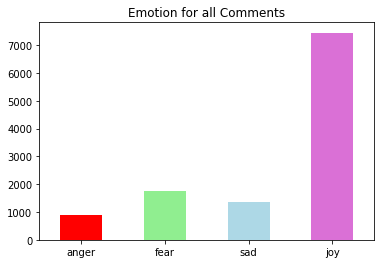

In [14]:
src.emotion_analysis.plot_data(data=full_scores)

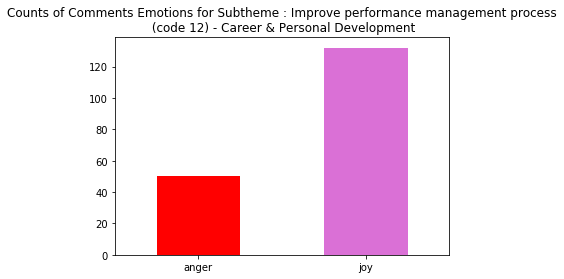

In [15]:
src.emotion_analysis.plot_data(data=agreement_scores, depth="subtheme", name=12)

In [16]:
src.emotion_analysis.display_top_emotions(full_scores, "fear", 5)

,code,text,theme,subtheme_description,anger,fear,sad,joy
10000,83,to not be afraid to truly blend with the staff...,Supervisors,Strengthen quality of supervisory leadership,4.366,6.610,2.548,1.032
9778,101,staffing levels. there is far too much violenc...,"Tools, Equipment & Physical Environment",Ensure safety and security of employees,4.054,6.573,5.534,1.953
12468,113,the trauma informed model does not work as a m...,"Vision, Mission & Goals",Improve program and/or policy implementation,1.836,6.327,1.031,3.352
14115,113,we have gotten to a point where the rights of ...,"Vision, Mission & Goals",Improve program and/or policy implementation,1.560,5.917,2.365,1.500
4610,94,as being part of a ministry that has a high le...,Stress & Workload,Support a healthy workplace,1.621,5.743,4.458,1.238


In [80]:
src.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, 10000, normalize=True)

,code,text,theme,subtheme_description,anger,fear,sad,joy,_anger,_fear,_joy,_sad
10000,83,to not be afraid to truly blend with the staff...,Supervisors,Strengthen quality of supervisory leadership,3.164,4.79,1.846,0.748,0,1,0,0




Comment
-------
to not be afraid to truly blend with the staff that do the front line work. to not fear a complaint because you put your heart on your sleeve. managers at all levels get burned and some become jaded and then they are controlled by fear, as they do not want to endure the pain and blame for trying to do the right thing. some curl up into a little ball out of fear, and not realizing that they are now cutting themselves off of everyone else, all the other staff that crave that personal touch. only a very small percentage staff will hurt their managers that care. no matter the approach, because that's the staffs problem and not the managers. remove fear from leadership to maximize loyal following. fewer neg folks to feed off of. thank you.


ANGER
-----
fear 0.500
complaint 0.485
fear 0.500
blame 0.484
fear 0.500
cutting 0.485
hurt 0.561
remove 0.351
fear 0.500


FEAR
-----
afraid 0.844
fear 0.828
fear 0.828
pain 0.594
fear 0.828
cutting 0.484
hurt 0.688
problem 0.266
remo

In [83]:
src.emotion_analysis.display_top_emotions(full_scores, "fear", 5, normalize=True)

,code,text,theme,subtheme_description,anger,fear,sad,joy
13444,13,trauma based training,Career & Personal Development,Improve training and development opportunities,0.00,27.600,0.00,0.00
9125,101,safety/security as my workplace has become mor...,"Tools, Equipment & Physical Environment",Ensure safety and security of employees,8.44,15.620,0.00,0.00
10780,93,stress and workload,Stress & Workload,Review workload expectations,0.00,14.633,0.00,0.00
5710,95,stress level management,Stress & Workload,Stress & workload - other,3.40,14.633,0.00,0.00
11532,93,deal with crushing work load.,Stress & Workload,Review workload expectations,14.70,13.440,12.18,6.24


In [74]:
src.emotion_analysis.examine_emotion_scoring(full_scores, "fear", lexicon, 13444)

,code,text,theme,subtheme_description,anger,fear,sad,joy,_anger,_fear,_joy,_sad
13444,13,trauma based training,Career & Personal Development,Improve training and development opportunities,0,0.828,0,0,0,1,0,0




Comment
-------
trauma based training 


ANGER
-----


FEAR
-----
trauma 0.828


JOY
-----


SAD
-----




In [70]:
# can easily change description and split into maybe 2 tables? 
# the 2nd one with a column of emotion name, any emotion, emotion max
src.emotion_analysis.summary(agreement_scores)

,Total Number of:,Count
0,Rows,31299
1,Unique Comments,11793
2,Emotionless Comments,6980
3,Comments with any Anger,12567
4,Comments with max Anger,1499
5,Comments with any Joy,22281
6,Comments with max Joy,7087


### Observations from subtheme level analysis

- joy is the most common emotion for all subthemes and agreement levels 
  - this seems to be due to the only words in the comment being happy
      - might be worth aggregating all of the sentences together and then doing the comparison
  - the other main reseson is the words are just with a negative context and since this is only matching words it doesn't understand the meaning
      - might be worth removing joy all together because it doesn't really match well
      
- a good set of the comments match to the emotion
    - Could manually score a small set of them to get an "accuracy" score
    - bit of weirdness due to context, government is one of the words in the lexicon and it is being used as a name compared to an emotion. Same with words like leave since it relates to time off not leaving often

- there are over 5000 comments that have no related emotion

- this seems counterintuitive
- subtheme 35, 82, 105
  - anger as dominant as joy in no agreement 
  - not since I made the adjustment to remove the emotionless comments
- subtheme 42, 101
  - fear is dominant as fear in strong agreement 
  